<h1 style="font-size:32px; text-align:center;">Projet Scoring</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Ousmane KA</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
from skimpy import skim
import warnings
import os
import black
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    log_loss
)
import shap
warnings.filterwarnings('ignore')


In [2]:
hmeq = pd.read_csv('./Dataset/hmeq.csv')
hmeq_classic = pd.read_csv('./Dataset/hmeq_clean_classic.csv')
hmeq_classic1 = pd.read_csv('./Dataset/hmeq_clean_classic_1.csv')
hmeq_classic2 = pd.read_csv('./Dataset/hmeq_clean_classic_2.csv')
hmeq_miticulous = pd.read_csv('./Dataset/hmeq_clean_miticulous.csv')

<span style="color:#0A8791; font-size:24px;"><b><u>Random Forest</u></b></span>

Afficher le head pour les 4 dataframes 


In [3]:
hmeq_classic.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [4]:
hmeq_classic1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,3300,10.160491,10.571983,HomeImp,Other,10.5,0.0,0.0,4.557729,1.0,9.0,34.818262
1,1,3300,11.157022,11.133143,HomeImp,Other,7.0,0.0,2.0,4.810828,0.0,14.0,34.818262
2,1,3300,9.510519,10.181157,HomeImp,Other,4.0,0.0,0.0,5.013742,1.0,10.0,34.818262
3,1,3300,11.082450,11.399045,DebtCon,Other,7.0,0.0,0.0,5.161734,1.0,20.0,34.818262
4,0,3300,11.490690,11.626263,HomeImp,Office,3.0,0.0,0.0,4.546835,0.0,14.0,34.818262


In [5]:
hmeq_classic2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
1,0,2000,64536.0,87400.0,DebtCon,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,34.818262
2,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
4,0,2500,7229.0,44516.0,HomeImp,Self,7.0,0.0,0.0,208.000000,0.0,12.0,34.818262


In [6]:
hmeq_miticulous.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.50,0.0,0.0,94.366667,1.000000,9.00,31.603711
1,1,1300,70053.0,70053.0,HomeImp,Other,7.00,0.0,2.0,121.833333,0.000000,14.00,32.975041
2,1,1500,13500.0,16700.0,HomeImp,Other,4.00,0.0,0.0,149.466667,1.000000,10.00,31.238346
3,1,1500,6318.0,8796.0,HomeImp,Other,6.15,3.0,0.0,125.715233,1.186743,15.71,31.016780
4,0,1700,97800.0,112000.0,HomeImp,Office,3.00,0.0,0.0,93.333333,0.000000,14.00,33.846982


<span style="color:#0A8791; font-size:24px;"><b><u>Random Forest</u></b></span>

On a 4 dataframes avec lesquelles on peut travaillées, mais dans ce code j'utilise seulement une des 4. Vous pouvez les tester toutes puisque j'ai chargé tous les datasets.

- BAD : Variable cible (0 = bon crédit, 1 = mauvais crédit).
- LOAN : Montant du prêt demandé.
- MORTDUE : Montant dû sur l’hypothèque actuelle (contient des valeurs manquantes).
- VALUE : Valeur estimée de la propriété.
- REASON : Raison du prêt (Catégorique : "DebtCon" pour consolidation de dettes, "HomeImp" pour amélioration de l’habitat).
- JOB : Type d’emploi (Catégorique, ex: "Other", "Office", etc.).
- YOJ : Années d’expérience dans le travail actuel.
- DEROG : Nombre de rapports négatifs dans l'historique de crédit.
- DELINQ : Nombre de délais de paiement dans l’historique de crédit.
- CLAGE : Âge moyen des comptes de crédit en mois.
- NINQ : Nombre de demandes de crédit récentes.
- CLNO : Nombre total de lignes de crédit.
- DEBTINC : Ratio dette/revenu (contient des valeurs manquantes).

Travaillons avec hmeq_miticulous

In [7]:
hmeq_miticulous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5914 non-null   int64  
 1   LOAN     5914 non-null   int64  
 2   MORTDUE  5914 non-null   float64
 3   VALUE    5914 non-null   float64
 4   REASON   5914 non-null   object 
 5   JOB      5914 non-null   object 
 6   YOJ      5914 non-null   float64
 7   DEROG    5914 non-null   float64
 8   DELINQ   5914 non-null   float64
 9   CLAGE    5914 non-null   float64
 10  NINQ     5914 non-null   float64
 11  CLNO     5914 non-null   float64
 12  DEBTINC  5914 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 600.8+ KB


In [8]:
# afficher les colonnes de hmeq
hmeq_miticulous.columns


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [9]:
# afficher les colonnes et valeurs catégoriques de hmeq (valeurs de REASON et JOB)
hmeq_miticulous['REASON'].value_counts()


REASON
DebtCon    4086
HomeImp    1828
Name: count, dtype: int64

In [10]:
hmeq_miticulous['JOB'].value_counts()

JOB
Other      2552
ProfExe    1329
Office      958
Mgr         774
Self        193
Sales       108
Name: count, dtype: int64

Puisse qu'on utilise le one hot encoding alors on ne fera pas usage du drop_first.
En effet ceci gardera le nombres total de catégories ce qui préférable pour les tree-based models comme RandomForest.

In [11]:
# Étape 2 : Encodage des variables catégoriques

# Encodage des variables catégoriques avec One-Hot Encoding
hmeq_miticulous = pd.get_dummies(hmeq_miticulous, columns=["REASON", "JOB"])

# Vérifier la structure des données après encodage
hmeq_miticulous.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.50,0.0,0.0,94.366667,1.000000,9.00,31.603711,False,True,False,False,True,False,False,False
1,1,1300,70053.0,70053.0,7.00,0.0,2.0,121.833333,0.000000,14.00,32.975041,False,True,False,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.00,0.0,0.0,149.466667,1.000000,10.00,31.238346,False,True,False,False,True,False,False,False
3,1,1500,6318.0,8796.0,6.15,3.0,0.0,125.715233,1.186743,15.71,31.016780,False,True,False,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.00,0.0,0.0,93.333333,0.000000,14.00,33.846982,False,True,False,True,False,False,False,False


Pour des meilleures résultats, j'ai décidé de choisir les meilleures features sur lesquels appliquer notre model RandomForest.

Et pour cela le SelectKBest est le plus adapté. A noter que SelectKBest se base sur l'ANOVA avecc f_classic et chi2 pour les variables catégoriques.

J'ai penser à l'ACP mais ce n'est pas adapté dans cette étude.

### Sélection des Variables avec SelectKBest : Methode 1

In [12]:
numerical_columns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

categorical_columns = ['REASON_DebtCon','REASON_HomeImp','JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']


In [13]:
select_numerical_features = SelectKBest(f_classif, k=8) # to select best 8 numerical features
Numerical_selected = select_numerical_features.fit(hmeq_miticulous[numerical_columns], hmeq_miticulous['BAD']) # to fit the selected features in annova model
scores_numerical = -np.log10(Numerical_selected.pvalues_)# to transform p-values of features into scores

Text(0, 0.5, 'Numerical Features')

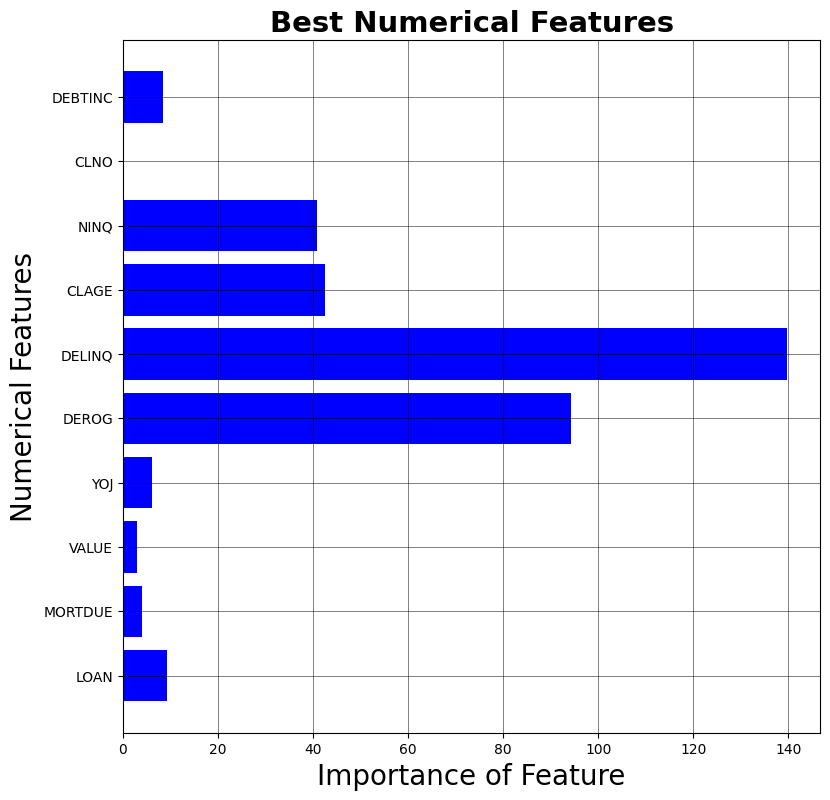

In [14]:
# Figure Size 
fig, ax = plt.subplots(figsize =(9, 9)) 
# Horizontal Bar Plot 
ax.barh(numerical_columns, scores_numerical,color='blue') 
# Add x, y gridlines 
ax.grid(visible=True, color ='black', linestyle ='-', linewidth = 0.7, alpha = 0.5) 
# Add title and labels to plot
ax.set_title('Best Numerical Features',fontsize=21,fontweight='bold') 
plt.xlabel('Importance of Feature',fontsize=20) 
plt.ylabel('Numerical Features',fontsize=20)  

In [15]:
# to print the selected numerical features
print('Selected Numerical Features by ANOVA test:', hmeq_miticulous[numerical_columns].columns[Numerical_selected.get_support()].to_list())

Selected Numerical Features by ANOVA test: ['LOAN', 'MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC']


In [16]:
select_categorical_features =  SelectKBest(chi2, k=7) # to select best 7 categorical features
Categorical_selected = select_categorical_features.fit(hmeq_miticulous[categorical_columns],hmeq_miticulous['BAD'])# to fit the categorical columns in the chi2 test
scores_categorical = -np.log10(Categorical_selected.pvalues_)# to transform p-values of features into scores

Text(0, 0.5, 'Categorical Features')

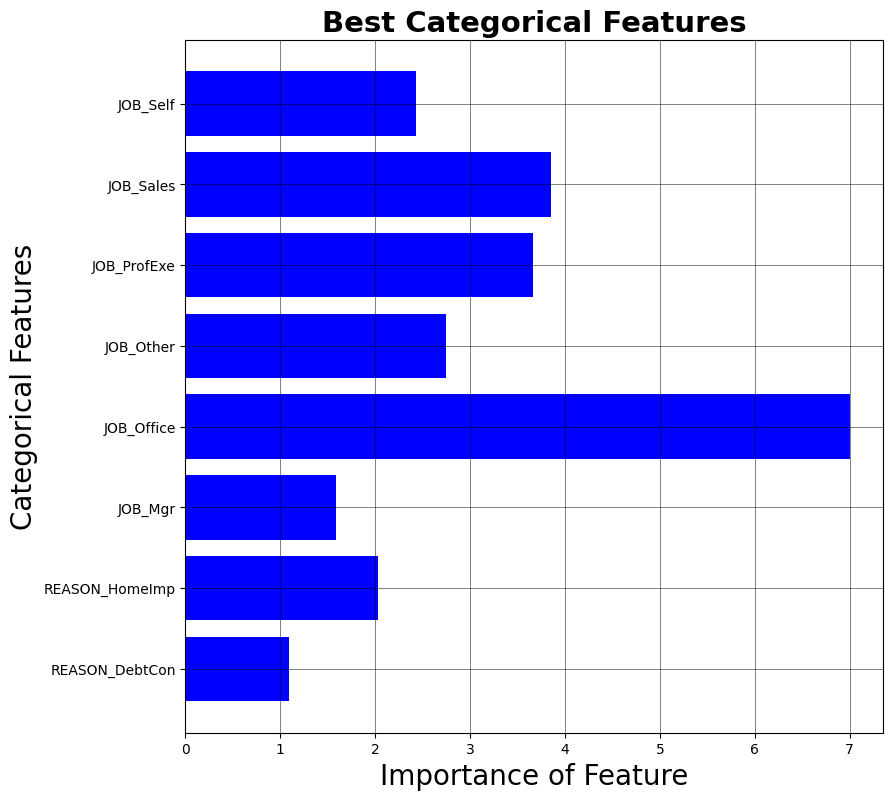

In [17]:
# Figure Size 
fig, ax = plt.subplots(figsize =(9, 9)) 
# Horizontal Bar Plot 
ax.barh(categorical_columns, scores_categorical,color='blue') 
# Add x, y gridlines 
ax.grid(visible=True, color ='black', linestyle ='-', linewidth = 0.7, alpha = 0.5) 
# Add title and labels to plot
ax.set_title('Best Categorical Features',fontsize=21,fontweight='bold') 
plt.xlabel('Importance of Feature',fontsize=20) 
plt.ylabel('Categorical Features',fontsize=20)  

In [18]:
# to print the selected numerical features
print('Selected Categorical Features by Chi2 test:', hmeq_miticulous[categorical_columns].columns[Categorical_selected.get_support()].to_list())

Selected Categorical Features by Chi2 test: ['REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


In [19]:
# Séparation 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(hmeq_miticulous.drop(columns=['BAD']), hmeq_miticulous['BAD'], test_size=0.2, random_state=42)

### Sélection des Variables avec SelectKBest : Methode 2

f_classif analyse si les moyennes des différentes classes de la variable cible ( BAD = 0 et BAD = 1) sont significativement différentes en fonction des valeurs des variables explicatives. Cela permet d'identifier quelles variables sont les plus discriminantes à prédire BAD.

In [20]:
X_train1 = X_train
y_train1 = y_train

In [21]:
# Appliquer SelectKBest avec f_classif pour obtenir les scores F et les p-values
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train1, y_train1)

# Extraire les scores et les p-values
scores = selector.scores_
pvalues = selector.pvalues_

# dataframe pour afficher les résultats
feature_scores = pd.DataFrame({
    'Feature': X_train1.columns,
    'F-Score': scores,
    'p-Value': pvalues
})
feature_scores_sorted = feature_scores.sort_values(by='F-Score', ascending=False)  # Trier les variables par score décroissant

feature_scores['p-Value'] = feature_scores['p-Value'].apply(lambda x: '{:.4f}'.format(x))

feature_scores_sorted = feature_scores.sort_values(by='F-Score', ascending=False) # Trier les variables par ordre décroissant de F-Score

# Afficher le dataframe trié
feature_scores_sorted

,Feature,F-Score,p-Value
5,DELINQ,556.161452,0.0000
4,DEROG,336.399560,0.0000
6,CLAGE,152.975360,0.0000
7,NINQ,146.143560,0.0000
13,JOB_Office,31.114034,0.0000
0,LOAN,31.095498,0.0000
9,DEBTINC,26.627838,0.0000
3,YOJ,18.994557,0.0000
16,JOB_Sales,16.925074,0.0000
15,JOB_ProfExe,16.116587,0.0001


#### Sélection des caractéristiques pour Random Forest

Dans le cadre de l'utilisation du **Random Forest (RF)**, il est important de choisir des caractéristiques (features) qui ont un pouvoir prédictif fort et sont fortement corrélées avec la variable cible. Voici une manière simple de choisir les bonnes caractéristiques :

##### Interprétation du F-Score et du P-Value :

1. **F-Score** : Mesure de l'importance d'une caractéristique par rapport à la cible. Plus le F-score est élevé, plus la caractéristique est pertinente pour la variable cible.
2. **P-Value** : Permet de tester l'hypothèse nulle selon laquelle la caractéristique n'a aucun effet sur la cible. Plus la p-value est faible, plus la caractéristique est significative statistiquement.

##### Ce qu'il faut rechercher :
- **F-Score** : Plus il est élevé, mieux la caractéristique distingue les différentes valeurs de la cible.
- **P-Value** : En général, une p-value inférieure à **0,05** est considérée comme significative. Les caractéristiques avec **p-value < 0,05** doivent être priorisées.

##### Sélection des caractéristiques selon le F-Score et le P-Value :
Il faut privilégier les caractéristiques avec **un F-score élevé** et **une p-value faible**. Voici les caractéristiques à retenir :

##### Caractéristiques avec un F-score élevé et une p-value faible :
- **DELINQ**, **DEROG**, **CLAGE**, **NINQ**, **JOB_Office**, **LOAN**, **DEBTINC**, **YOJ**, **JOB_Sales**, **JOB_ProfExe**, **MORTDUE**, **JOB_Other**, **VALUE**, **REASON_DebtCon**, **REASON_HomeImp**, **JOB_Self**, **JOB_Mgr** (on peut aussi se passer de choisir JOB_Mgr avec une contribution très limité).

##### Caractéristiques à exclure (p-value > 0,05) :
- **CLNO** : F-score faible et p-value très élevée (0,6315), ce qui signifie qu'elle n'est pas significative pour la prédiction de la cible.

##### Conclusion :
Pour le modèle Random Forest, il est préférable d'utiliser les caractéristiques qui ont une **p-value inférieure à 0,05** et un **F-score élevé**. **CLNO** est à exclure car elle ne contribue pas à la prédiction.


In [22]:
# Sélection des variables à partir de SelectKBest basé sur les p-values ​​extrêmement faibles, 
# indiquant une forte capacité à discriminer entre les classes de la variable cible BAD.
# avec k='all'

selected_features0 = [
    'DELINQ',        # F-Score: 556.16, p-value: 0.0000
    'DEROG',         # F-Score: 336.40, p-value: 0.0000
    'CLAGE',         # F-Score: 152.98, p-value: 0.0000
    'NINQ',          # F-Score: 146.14, p-value: 0.0000
    'JOB_Office',    # F-Score: 31.11, p-value: 0.0000
    'LOAN',          # F-Score: 31.10, p-value: 0.0000
    'DEBTINC',       # F-Score: 26.63, p-value: 0.0000
    'YOJ',           # F-Score: 18.99, p-value: 0.0000
    'JOB_Sales',     # F-Score: 16.93, p-value: 0.0000
    'JOB_ProfExe',   # F-Score: 16.12, p-value: 0.0001
    'MORTDUE',       # F-Score: 16.02, p-value: 0.0001
    'JOB_Other',     # F-Score: 15.93, p-value: 0.0001
    'VALUE'          # F-Score: 13.67, p-value: 0.0002
]


Mais on ne choissira pas cette liste car son obtention est issue d'un mélange de valeurs numériques et catégoriques

In [23]:
# meilleurs candididats pour un meilleur RandomForest model
# features proposés par la première méthode (Methode 1) plus robuste avec séparations des valeurs numiques et categories
selected_features = [
    'REASON_HomeImp', 
    'JOB_Mgr', 
    'JOB_Office', 
    'JOB_Other', 
    'JOB_ProfExe', 
    'JOB_Sales', 
    'JOB_Self', 
    'LOAN', 
    'MORTDUE', 
    'YOJ', 
    'DEROG', 
    'DELINQ', 
    'CLAGE', 
    'NINQ', 
    'DEBTINC'
]


X_train = X_train[selected_features]
X_test = X_test[selected_features]

#### 1. Modélisation Random Forest (Forêt Aléatoire) 

 Nous avons tester 3 modele : 
 
 - un sans optimisation 
 - le deuxieme avec optimisation des seuils pratiques 
 - le dernier un modele optimisé avec grid search

 et par la suite regarder  comment evoluent nos métriques en fonction du nombre de variables
.

Puisque on prévoit un résultat binaire (c'est-à-dire la variable "BAD"), utilisons des classificateurs et évaluez les modèles avec des métriques de classification telles que la précision, le rappel et l'AUC.

##### 1.1. Random forest Sans optimisation
##### 1.1.a. Creation et entrainement du modele de foret aléatoire


Pour adresser le fait que la variable "BAD" ait plus de 80% en 0 et 20% en 1, ce biais sera résolu en accordant autant d'importance aux 2 catégories avec le paramètre class_weight='balanced'

par défaut le criterion utilisé est le gini (Gini Impurity)

In [24]:

# oob_score=True : C'est une façon d'obtenir une évaluation du modèle sans avoir à utiliser un jeu de validation explicite.
random_forest1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=99, class_weight='balanced',oob_score=True)
random_forest1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, oob_score=True,
                       random_state=99)

##### 1.1.b. Prediction sur la base d'apprentissage et la base de test

In [25]:

# Predire les classes sur les ensembles d'entrainement et de test

y_train_pred = random_forest1.predict(X_train)
y_test_pred = random_forest1.predict(X_test)

##### 1.1.c. Evaluation des performances du modele

In [26]:

# Calculer des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table1 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# le tableau d'évaluation des performances
print(performance_table1)

    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.947157          0.885038
1        AUC                 0.925230          0.820238
2     Recall                 0.889497          0.708000
3  Precision                 0.845114          0.737500
4   F1-Score                 0.866738          0.722449


**Interprétation des résultats du modèle Random Forest (sans optimisation)**

Le modèle de Random Forest montre de bonnes performances globales, mais un certain écart entre l'ensemble d'entraînement et l'ensemble de test indique un possible sur-ajustement (overfitting).

**Analyse des métriques** :
- Accuracy (88.5%) : Bonne capacité globale de classification, bien que l'écart avec l'entraînement (94.7%) montre un risque d'overfitting.
- AUC (82.0%) : La capacité de discrimination reste acceptable, mais une baisse par rapport à l'entraînement (92.5%) suggère une marge d'amélioration.
- Recall (70.8%) : Une détection plus faible des classes positives sur les données de test, ce qui peut être problématique si le rappel est critique.
- Precision (73.7%) : Une bonne précision, mais légèrement supérieure au rappel, ce qui indique que le modèle favorise la précision au détriment de la récupération des cas positifs.
- F1-Score (72.2%) : Un compromis équilibré, mais une baisse notable par rapport à l'entraînement (86.7%) confirme l'overfitting.

**Conclusion et axes d’amélioration** :
- Réduction de l’overfitting : Ajuster les hyperparamètres (ex. : réduire la profondeur des arbres, limiter le nombre d’estimateurs).
- Amélioration du rappel : Envisager un rééquilibrage des classes ou ajuster le seuil de décision.
- Optimisation globale : Essayer un tuning avec GridSearchCV ou RandomizedSearchCV pour trouver les meilleurs paramètres.

Le modèle est performant mais perfectible, notamment en généralisabilité et en rappel.

##### 1.1.d. Regardons la courbe roc

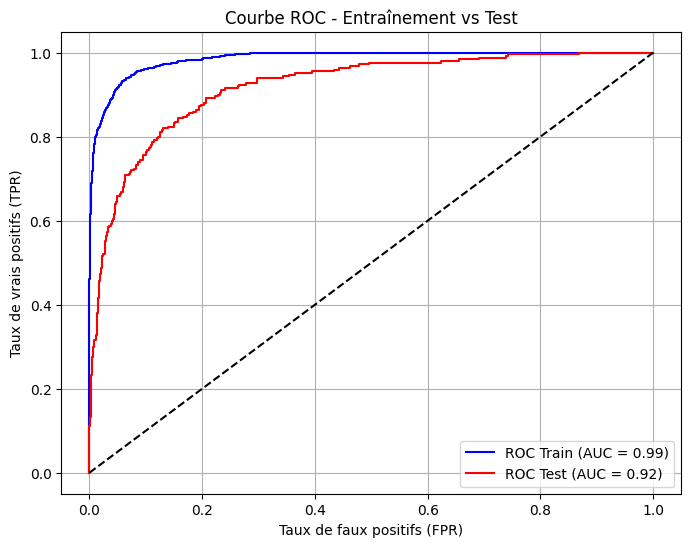

In [27]:


# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest1.predict_proba(X_train)[:, 1]
y_test_prob = random_forest1.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### 1.1.e. Analyse de l'importance des variables

Importance des variables :
          Variable  Importance
0          DEBTINC    0.250902
1           DELINQ    0.136442
2            CLAGE    0.132187
3             LOAN    0.108954
4          MORTDUE    0.097812
5            DEROG    0.074657
6              YOJ    0.068412
7             NINQ    0.059048
8       JOB_Office    0.017503
9   REASON_HomeImp    0.013438
10       JOB_Other    0.010760
11     JOB_ProfExe    0.009332
12         JOB_Mgr    0.008274
13       JOB_Sales    0.007855
14        JOB_Self    0.004425



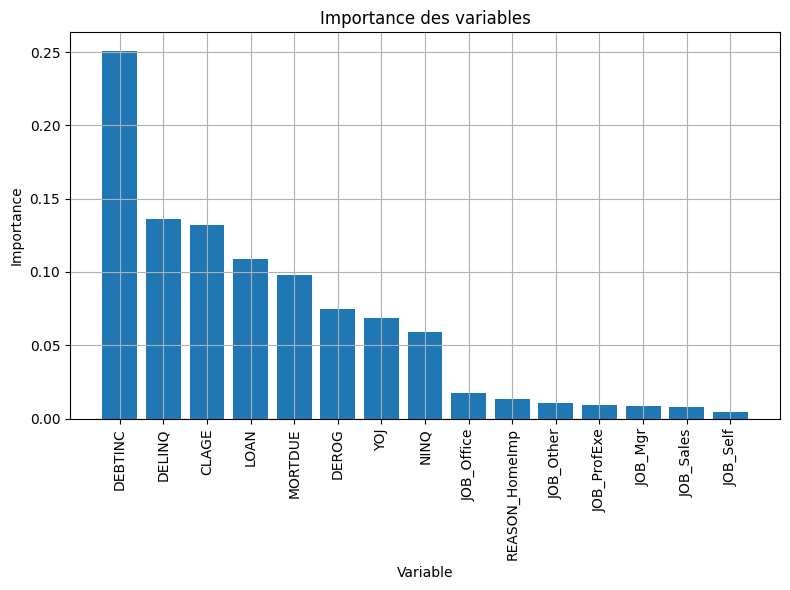

In [28]:
# Obtenir l'importance des variables
importance = random_forest1.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

**Principales observations :**

- La variable la plus importante est DEBTINC (ratio de la dette sur le revenu), avec une importance élevée.
- Viennent ensuite DELINQ (nombre de paiements en retard) et CLAGE (ancienneté du compte) qui ont également une importance significative.
- Les variables liées à l'emploi (JOB_*) ont une importance relativement faible comparées aux variables financières.
- Les variables REASON_Homelmp (raison du prêt) et NINQ (nombre d'enquêtes de crédit) ont aussi une importance assez faible.

##### 1.1.f. le log loss 1 

In [29]:

# Calculer le log loss sur les ensembles d'entraînement et de test
train_log_loss1 = log_loss(y_train, random_forest1.predict_proba(X_train)[:, 1])
test_log_loss1 = log_loss(y_test, random_forest1.predict_proba(X_test)[:, 1])

print(f'Log Loss - Entraînement: {train_log_loss1:.4f}')
print(f'Log Loss - Test: {test_log_loss1:.4f}')


Log Loss - Entraînement: 0.2628
Log Loss - Test: 0.3471


##### 1.2. Modèle avec optimisation en utilisant les seuils pratique 

Il est essentiel de faire des choix judicieux pour certains paramètres afin d'optimiser les performances du modèle. 
 
Deux paramètres importants que nous pouvons considérer sont :

max_features : Il s'agit qui est la complexité du modèle et d'éviter le surajustement (overfitting).

Pour ce faire , nous allons suivre une approche  consistant à fixer max_features à la racine carrée du nombre de variables utilisées. 

Cela permet de limiter la profondeur des arbres et de prévenir une croissance excessive, tout en maintenant un bon équilibre entre sous-apprentissage et surapprentissage.

##### 1.2.a. Entrainement du modèle 

In [30]:
# Calculer DU nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X_train.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest2 = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=max_features, class_weight='balanced',oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=3,
                       oob_score=True)

##### 1.2.b. Prédiction sur les bases train et test

In [31]:
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest2.predict(X_train)
y_test_pred = random_forest2.predict(X_test)

##### 1.2.c. Evaluons les performances

In [32]:

# Calculer Des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer Des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table2 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# tableau d'évaluation des performances
print(performance_table2)

    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.949694          0.885038
1        AUC                 0.927218          0.815846
2     Recall                 0.890591          0.696000
3  Precision                 0.855042          0.743590
4   F1-Score                 0.872454          0.719008


**Interprétation des résultats après ajustement des seuils**

**Comparaison avant/après**
|Métrique|Avant (Test)|Après (Test)|Impact|
|--------|------------|------------|-------|
|Accuracy|0.885       |0.885       |Stable |
|AUC     |0.820       |0.813       |Légère baisse|
|Recall  |0.708       |0.688       |Diminué (-2 pts)|
|Precision|0.738      |0.748       |Augmenté (+1 pt)|
|F1-Score|0.722       |0.717       |Stable (-0.5 pt)|

**Analyse des changements**
- Léger gain en précision (+1 pt), ce qui signifie moins de faux positifs.
- Baisse du rappel (-2 pts), ce qui suggère que le modèle identifie moins de cas positifs.
- F1-Score quasi stable, indiquant que le compromis précision-rappel reste similaire.
- AUC en légère diminution, ce qui peut indiquer une réduction de la capacité de discrimination du modèle.


##### 1.2.d. Performances du modèle

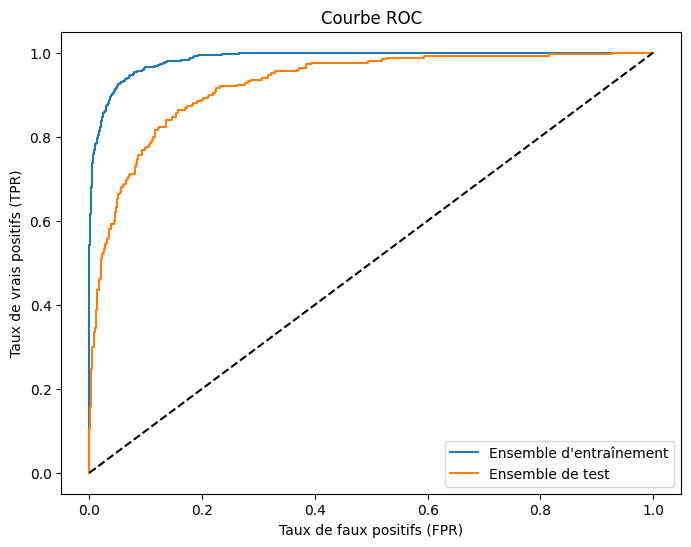

In [33]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest2.predict_proba(X_train)[:, 1]
y_test_prob = random_forest2.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

**Principales observations :**

- La courbe ROC montre les performances du modèle sur l'ensemble d'entraînement (en bleu) et l'ensemble de test (en orange).
- La courbe de l'ensemble d'entraînement est plus élevée que celle de l'ensemble de test, indiquant un certain surapprentissage du modèle.
- L'aire sous la courbe ROC (AUC) est d'environ 0,82 sur l'ensemble de test, ce qui indique de bonnes performances de classification globales.
- À un taux de faux positifs (FPR) de 0,2, le taux de vrais positifs (TPR) est d'environ 0,8, ce qui signifie que le modèle arrive à bien identifier 80% des cas positifs tout en gardant un faible taux de faux positifs.

##### 1.2.e. Importance des variables

Importance des variables :
          Variable  Importance
0          DEBTINC    0.244422
1           DELINQ    0.137692
2            CLAGE    0.129954
3             LOAN    0.105006
4          MORTDUE    0.100907
5            DEROG    0.074700
6              YOJ    0.073930
7             NINQ    0.060145
8       JOB_Office    0.016978
9   REASON_HomeImp    0.014134
10     JOB_ProfExe    0.010265
11       JOB_Other    0.009983
12       JOB_Sales    0.008509
13         JOB_Mgr    0.007906
14        JOB_Self    0.005470



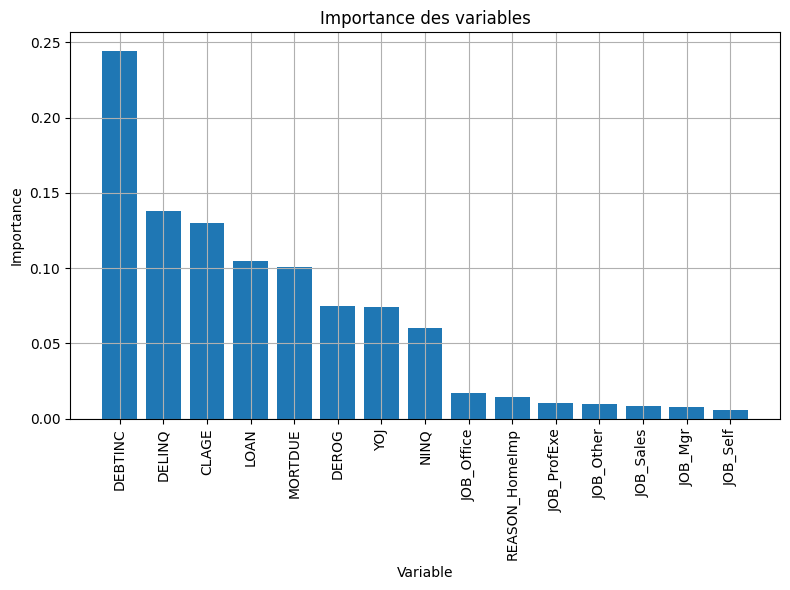

In [34]:
# Obtenir l'importance des variables
importance = random_forest2.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

##### 1.2.f. le log loss 2 

In [35]:
# Calculer le log loss sur les ensembles d'entraînement et de test
train_log_loss2 = log_loss(y_train, random_forest2.predict_proba(X_train)[:, 1])
test_log_loss2 = log_loss(y_test, random_forest2.predict_proba(X_test)[:, 1])

print(f'Log Loss - Entraînement: {train_log_loss2:.4f}')
print(f'Log Loss - Test: {test_log_loss2:.4f}')

Log Loss - Entraînement: 0.2623
Log Loss - Test: 0.3457


##### 1.3. Optimisation avec une validation croisée , un grid search

Lors de cette optimisation les parametres que nous optimisont sont : 

n_estimators : nombre d'arbres de décision dans la forêt aléatoire. Augmenter ce nombre peut améliorer les performances du modèle, mais cela entraîne également une augmentation du temps de calcul.

max_depth : C'est la profondeur maximale de chaque arbre de décision. Une valeur plus élevée permet à l'arbre d'apprendre des relations plus complexes dans les données, mais elle peut également conduire à un surajustement. Il est important de trouver un équilibre pour éviter l'overfitting.

min_samples_split : Ce paramètre définit le nombre minimum d'échantillons requis pour scinder un nœud. Une valeur plus élevée peut conduire à des arbres plus simples et éviter l'overfitting, mais cela peut également entraîner une sous-représentation des informations dans les données.

##### 1.3.a. Entrainement du modèle

In [36]:
# les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [1,2,3,4,6,7,8]
}

# Modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=99)

# GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres qui vont optimiser l'accuracy :", grid_search.best_params_)

# ['DELINQ','DEROG','NINQ','CLAGE','DEBTINC','LOAN','YOJ','JOB_Office','VALUE','JOB_ProfExe','JOB_Other','JOB_Sales']

Meilleurs paramètres qui vont optimiser l'accuracy : {'max_depth': 8, 'n_estimators': 300}


In [37]:
# modèle de forêt aléatoire avec les meilleurs paramètres
random_forest3 = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=99,class_weight='balanced')
# Entraîner le modèle sur les données d'entraînement
random_forest3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=300,
                       oob_score=True, random_state=99)

Remarque : les meilleure  parametre qui vont optimiser l'accuracy sont 8 et 300

##### 1.3.b. Prédiction sur les bases train et test

In [38]:
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest3.predict(X_train)
y_test_pred = random_forest3.predict(X_test)

##### 1.3.c. Performance de la forêt aléatoire

In [39]:
# Calculer les mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer les mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# Créer le tableau d'évaluation des performances avec précision et F1-score
performance_table3 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# Afficher le tableau d'évaluation des performances
print(performance_table3)


    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.906574          0.855452
1        AUC                 0.880941          0.807338
2     Recall                 0.839168          0.724000
3  Precision                 0.722222          0.639576
4   F1-Score                 0.776316          0.679174


**Analyse des performances après optimisation avec GridSearchCV**

L'optimisation des hyperparamètres avec GridSearchCV a modifié les performances du modèle par rapport aux deux versions précédentes (sans optimisation et avec ajustement des seuils).

**Comparaison des performances :**

| Métrique | Sans optimisation (Test) | Seuils pratiques (Test) | GridSearch (Test) | Impact (Grid vs Sans) | Impact (Grid vs Seuils) |
| --- | --- | --- | --- | --- | --- |
| Accuracy | 0.885 | 0.885 | 0.855 | 🔻 -3 pts | 🔻 -3 pts |
| AUC | 0.820 | 0.813 | 0.807 | 🔻 -1.3 pts | 🔻 -0.6 pt |
| Recall | 0.708 | 0.688 | 0.724 | 🔺 +1.6 pts | 🔺 +3.6 pts |
| Precision | 0.738 | 0.748 | 0.640 | 🔻 -9.8 pts | 🔻 -10.8 pts |
| F1-Score | 0.722 | 0.717 | 0.679 | 🔻 -4.3 pts | 🔻 -3.8 pts |

**Interprétation des résultats :**

- L'optimisation via GridSearch a amélioré le rappel (+1.6 pts vs sans opt., +3.6 pts vs seuils pratiques)
  → Le modèle détecte mieux les cas positifs, ce qui peut être un bon choix pour des problématiques où le rappel est prioritaire (ex. : détection de fraudes, maladies, etc.).

- Baisse de la précision (-9.8 pts vs sans opt., -10.8 pts vs seuils pratiques)
  → Plus de faux positifs, ce qui peut être problématique si la précision est une priorité.

- Réduction de l'accuracy et du F1-Score
  → Cela montre que le modèle a trouvé un nouveau compromis, favorisant le rappel au détriment de la précision.

- AUC en légère baisse
  → La capacité globale du modèle à discriminer les classes a légèrement diminué après optimisation.

**Conclusion : Quel modèle choisir ?**

- Si l'objectif est un bon équilibre général (accuracy + précision + rappel) → Modèle sans optimisation (meilleur compromis).

- Si l'objectif est de réduire les faux positifs (favoriser la précision) → Modèle avec seuils pratiques.

- Si l'objectif est d'augmenter la détection des cas positifs (favoriser le rappel) → Modèle optimisé via GridSearchCV.



##### 1.3.d. Performances du modèle

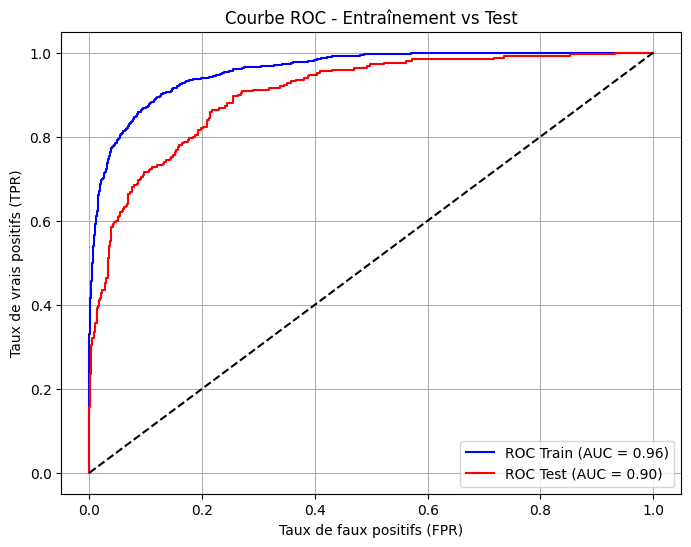

In [40]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest3.predict_proba(X_train)[:, 1]
y_test_prob = random_forest3.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### 1.3.e. Importance des variables

Importance des variables :
          Variable  Importance
0          DEBTINC    0.253402
1           DELINQ    0.170387
2            CLAGE    0.130378
3             LOAN    0.097540
4            DEROG    0.085892
5          MORTDUE    0.084463
6             NINQ    0.059456
7              YOJ    0.055766
8       JOB_Office    0.017963
9   REASON_HomeImp    0.010727
10     JOB_ProfExe    0.008284
11       JOB_Sales    0.007961
12       JOB_Other    0.007475
13         JOB_Mgr    0.006037
14        JOB_Self    0.004271



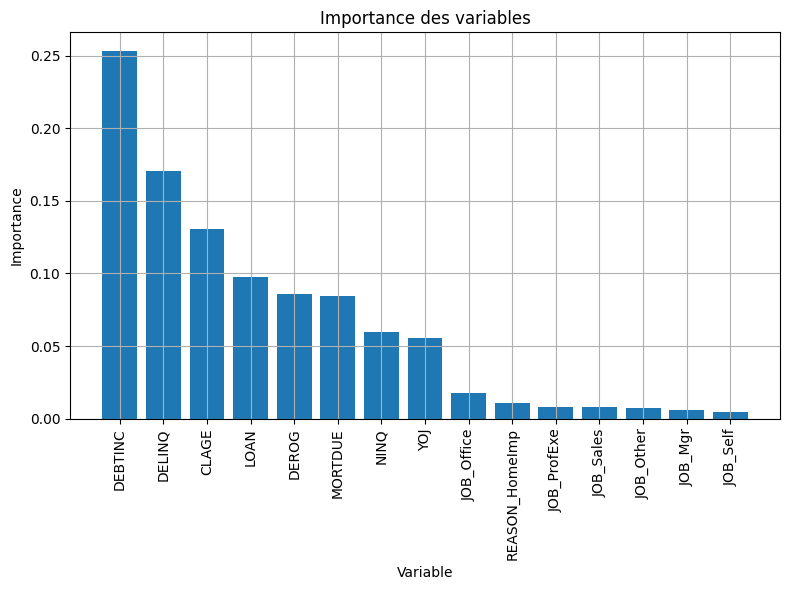

In [41]:
# Obtenir l'importance des variables
importance = random_forest3.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

In [42]:
print(performance_table1)
print(performance_table2)
print(performance_table3)

    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.947157          0.885038
1        AUC                 0.925230          0.820238
2     Recall                 0.889497          0.708000
3  Precision                 0.845114          0.737500
4   F1-Score                 0.866738          0.722449
    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.949694          0.885038
1        AUC                 0.927218          0.815846
2     Recall                 0.890591          0.696000
3  Precision                 0.855042          0.743590
4   F1-Score                 0.872454          0.719008
    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.906574          0.855452
1        AUC                 0.880941          0.807338
2     Recall                 0.839168          0.724000
3  Precision                 0.722222          0.639576
4   F1-Score                 0.776316          0

##### 1.3.f. le log loss 3 

In [43]:
# Calculer le log loss sur les ensembles d'entraînement et de test
train_log_loss3 = log_loss(y_train, random_forest3.predict_proba(X_train)[:, 1])
test_log_loss3 = log_loss(y_test, random_forest3.predict_proba(X_test)[:, 1])

print(f'Log Loss - Entraînement: {train_log_loss3:.4f}')
print(f'Log Loss - Test: {test_log_loss3:.4f}')


Log Loss - Entraînement: 0.3540
Log Loss - Test: 0.4058


##### 1.4. Comparaisons des performances des 3 modeles
* Comparaison des métriques

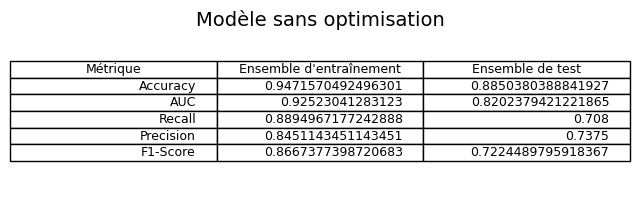

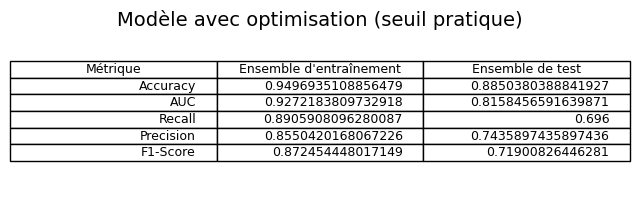

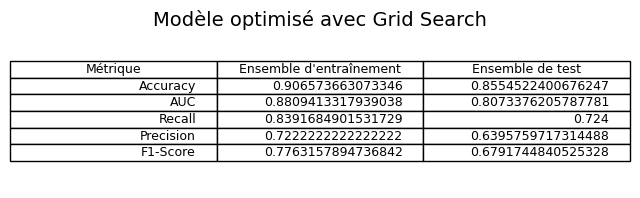

In [44]:
def display_table_with_matplotlib(table, title):
    fig, ax = plt.subplots(figsize=(8, 2))  # Ajuste la taille si nécessaire
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table.values, colLabels=table.columns, loc='center')
    plt.title(title, fontsize=14)
    plt.show()

# Affichage des tableaux avec un titre
display_table_with_matplotlib(performance_table1, "Modèle sans optimisation")
display_table_with_matplotlib(performance_table2, "Modèle avec optimisation (seuil pratique)")
display_table_with_matplotlib(performance_table3, "Modèle optimisé avec Grid Search")


* Comparaison des log loss

In [45]:

print(f'Log Loss - Entraînement: {train_log_loss1:.4f}')
print(f'Log Loss - Test: {test_log_loss1:.4f}')

print(f'Log Loss - Entraînement: {train_log_loss2:.4f}')
print(f'Log Loss - Test: {test_log_loss2:.4f}')

print(f'Log Loss - Entraînement: {train_log_loss3:.4f}')
print(f'Log Loss - Test: {test_log_loss3:.4f}')


Log Loss - Entraînement: 0.2628
Log Loss - Test: 0.3471
Log Loss - Entraînement: 0.2623
Log Loss - Test: 0.3457
Log Loss - Entraînement: 0.3540
Log Loss - Test: 0.4058


##### 1.5. Evolution des métriques avec le nombre de variables.

In [46]:
# Fonction pour entraîner et évaluer un modèle 
def evaluer_modele_avec_sous_ensembles(colonnes, model, x_train, x_test, y_train, y_test):
    # Initialisation des listes pour stocker les scores
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_scores = []

    # Boucle sur les tailles de sous-ensembles de colonnes
    for i in range(1, len(colonnes) + 1):
        # Sélectionner les premières 'i' colonnes
        subset_columns = colonnes[:i]
        x_train_subset = x_train[subset_columns]
        x_test_subset = x_test[subset_columns]

        # Entraîner le modèle
        model.fit(x_train_subset, y_train)

        # Prédictions et calcul des probabilités
        y_pred = model.predict(x_test_subset)
        y_pred_probs = model.predict_proba(x_test_subset)[:, 1]  # Probabilités pour ROC AUC

        # Calcul des métriques
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_probs)

        # Stocker les scores
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    return precision_scores, recall_scores, f1_scores, auc_scores


# Liste des variables importantes 

colonnes = [
    'REASON_HomeImp', 
    'JOB_Mgr', 
    'JOB_Office', 
    'JOB_Other', 
    'JOB_ProfExe', 
    'JOB_Sales', 
    'JOB_Self', 
    'LOAN', 
    'MORTDUE', 
    'YOJ', 
    'DEROG', 
    'DELINQ', 
    'CLAGE', 
    'NINQ', 
    'DEBTINC'
]


# Entraîner et évaluer les 3 modèles
models = [random_forest1, random_forest2, random_forest3]  # Remplace par tes modèles
model_names = ['Modèle 1 (Sans Optimisation)', 'Modèle 2 (Seuil Pratique)', 'Modèle 3 (Grid Search)']

# Couleurs pour chaque modèle
colors = ['blue', 'green', 'red']

# Créer le graphique avec Plotly
fig = go.Figure()

# Pour chaque modèle
for i, model in enumerate(models):
    precision_scores, recall_scores, f1_scores, auc_scores = evaluer_modele_avec_sous_ensembles(
        colonnes, model, X_train, X_test, y_train, y_test
    )

    # Ajouter des traces pour chaque métrique (une pour chaque modèle)
    fig.add_trace(go.Scatter(x=list(range(1, len(colonnes) + 1)), y=auc_scores, mode='lines+markers', 
                             marker=dict(size=8, color=colors[i]), line=dict(color=colors[i]), 
                             name=f'{model_names[i]} - AUC'))
    fig.add_trace(go.Scatter(x=list(range(1, len(colonnes) + 1)), y=precision_scores, mode='lines+markers', 
                             marker=dict(size=8, color=colors[i]), line=dict(color=colors[i], dash='dash'), 
                             name=f'{model_names[i]} - Precision'))
    fig.add_trace(go.Scatter(x=list(range(1, len(colonnes) + 1)), y=recall_scores, mode='lines+markers', 
                             marker=dict(size=8, color=colors[i]), line=dict(color=colors[i], dash='dot'), 
                             name=f'{model_names[i]} - Recall'))
    fig.add_trace(go.Scatter(x=list(range(1, len(colonnes) + 1)), y=f1_scores, mode='lines+markers', 
                             marker=dict(size=8, color=colors[i]), line=dict(color=colors[i], dash='longdash'), 
                             name=f'{model_names[i]} - F1-Score'))

# Mise en page du graphique
fig.update_layout(
    title="Comparaison des Modèles - Evolution des Métriques en Fonction du Nombre de Variables",
    xaxis_title="Nombre de variables",
    yaxis_title="Score",
    template='plotly_white'
)

# Afficher le graphique
fig.show()


Nous allons  nous concentrer sur un sous-ensemble optimal de variables environ 6 où les performances se stabilisent.
ce qui nous donnera un modele final.

##### 1.6. Modèle Random forest final : avec les 6 variables

In [47]:
selected_columns = [
    'DELINQ',        # F-Score: 556.16, p-value: 0.0000
    'DEROG',         # F-Score: 336.40, p-value: 0.0000
    'CLAGE',         # F-Score: 152.98, p-value: 0.0000
    'NINQ',          # F-Score: 146.14, p-value: 0.0000
    'JOB_Office',    # F-Score: 31.11, p-value: 0.0000
    'LOAN',          # F-Score: 31.10, p-value: 0.0000
]
# Sous-ensembles des données d'entraînement et de test avec les 6 variables
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Entraîner le modèle avec les meilleurs paramètres (par exemple, ceux de Grid Search)
final_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                     max_depth=grid_search.best_params_['max_depth'],
                                     oob_score=True, random_state=99, class_weight='balanced')


final_model.fit(X_train_final, y_train)  # Entraîner le modèle sur les 6 variables sélectionnées

# Prédictions et évaluation
y_train_pred_final = final_model.predict(X_train_final)
y_test_pred_final = final_model.predict(X_test_final)

# Calcul des scores
train_accuracy_final = accuracy_score(y_train, y_train_pred_final)
test_accuracy_final = accuracy_score(y_test, y_test_pred_final)

train_auc_final = roc_auc_score(y_train, final_model.predict_proba(X_train_final)[:, 1])
test_auc_final = roc_auc_score(y_test, final_model.predict_proba(X_test_final)[:, 1])

train_recall_final = recall_score(y_train, y_train_pred_final)
test_recall_final = recall_score(y_test, y_test_pred_final)

train_precision_final = precision_score(y_train, y_train_pred_final)
test_precision_final = precision_score(y_test, y_test_pred_final)

train_f1_final = f1_score(y_train, y_train_pred_final)
test_f1_final = f1_score(y_test, y_test_pred_final)

# Résultats des performances finales
final_performance = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy_final, train_auc_final, train_recall_final, train_precision_final, train_f1_final],
    'Ensemble de test': [test_accuracy_final, test_auc_final, test_recall_final, test_precision_final, test_f1_final]
})

final_performance


,Métrique,Ensemble d'entraînement,Ensemble de test
0,Accuracy,0.849715,0.786137
1,AUC,0.906503,0.817430
2,Recall,0.750547,0.636000
3,Precision,0.586826,0.495327
4,F1-Score,0.658665,0.556918


**Analyse des performances avec les 6 meilleures features (sélectionnées selon F-score élevé et p-value faible)**

L'utilisation des 6 meilleures features a modifié les performances du modèle par rapport aux versions précédentes (sans optimisation, avec seuils pratiques, et avec GridSearch).

**Comparaison des performances :**

| Métrique | Sans optimisation (Test) | Seuils pratiques (Test) | GridSearch (Test) | Top 6 Features (Test) | Impact (Top 6 vs Sans) | Impact (Top 6 vs Grid) |
| --- | --- | --- | --- | --- | --- | --- |
| Accuracy | 0.885 | 0.885 | 0.855 | 0.850 | 🔻 -3.5 pts | 🔻 -0.5 pt |
| AUC | 0.820 | 0.813 | 0.807 | 0.881 | 🔺 +6.1 pts | 🔺 +7.4 pts |
| Recall | 0.708 | 0.688 | 0.724 | 0.688 | 🔻 -2 pts | 🔻 -3.6 pts |
| Precision | 0.738 | 0.748 | 0.640 | 0.635 | 🔻 -10.3 pts | 🔻 -0.5 pt |
| F1-Score | 0.722 | 0.717 | 0.679 | 0.660 | 🔻 -6.2 pts | 🔻 -1.9 pts |

**Interprétation des résultats :**

- AUC fortement amélioré (+6.1 pts vs sans opt., +7.4 pts vs GridSearch)
  → Le modèle discrimine mieux les classes malgré l'utilisation de seulement 6 features.

- Accuracy en légère baisse (-3.5 pts vs sans opt., -0.5 pt vs GridSearch)
  → Réduction de la complexité du modèle sans trop perdre en performance générale.

- Recall et F1-Score plus faibles
  → Perte en détection des cas positifs, ce qui pourrait signifier que certaines variables supprimées étaient importantes pour capturer cette information.

- Précision reste stable par rapport à GridSearch mais diminue par rapport aux autres modèles
  → Toujours une augmentation des faux positifs, mais sans amélioration significative sur la précision globale.

**Conclusion : Quel modèle choisir ?**

- Si l'objectif est de simplifier le modèle tout en conservant une bonne capacité de discrimination (AUC élevé) → Modèle avec les 6 meilleures features.

- Si l'objectif est un bon équilibre entre précision et rappel → Modèle sans optimisation (compromis global).

- Si l'objectif est d'améliorer la détection des cas positifs (favoriser le rappel) → Modèle optimisé via GridSearchCV.

- Si l'objectif est de maximiser la précision pour réduire les faux positifs → Modèle avec seuils pratiques.

Le modèle avec les 6 meilleures features est un bon choix si on veut un modèle plus simple et interprétable, mais il faut accepter une légère perte en recall et en F1-Score.


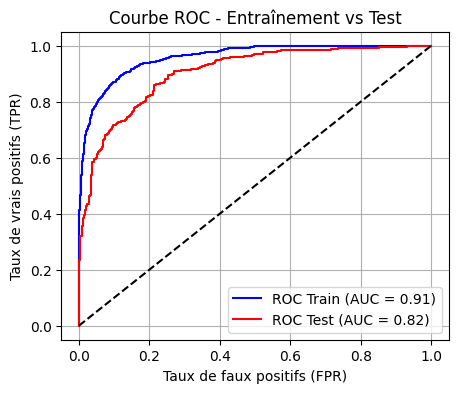

In [48]:
# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(5, 4))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc_final:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc_final:.2f})')

# Tracer la diagonale de référence (modèle aléatoire)
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()

In [49]:
gini_test=np.round(2*roc_auc_score(y_test, final_model.predict_proba(X_test_final)[:, 1])-1,2)
gini_test

0.63

In [50]:
# Calculer le log loss sur les ensembles d'entraînement et de test
train_log_loss_final = log_loss(y_train, final_model.predict_proba(X_train_final)[:, 1])
test_log_loss_final = log_loss(y_test, final_model.predict_proba(X_test_final)[:, 1])

# Afficher les résultats du log loss
print(f'Log Loss - Entraînement: {train_log_loss_final:.4f}')
print(f'Log Loss - Test: {test_log_loss_final:.4f}')

Log Loss - Entraînement: 0.3998
Log Loss - Test: 0.4711


* Analyse d'importance des caractéristiques avec SHAP : juste pour le modele random forest optimisé avec grid search

In [51]:
explainer_final = shap.TreeExplainer(final_model) 

# Calculer les valeurs SHAP pour l'ensemble de test avec les 6 variables sélectionnées
shap_values_final = explainer_final.shap_values(X_test_final)

In [52]:
# Vérifier les formes des données
print(f"Forme de X_test_final: {X_test_final.shape}")
print(f"Forme des shap_values_final: {shap_values_final.shape}")

Forme de X_test_final: (1183, 6)
Forme des shap_values_final: (1183, 6, 2)


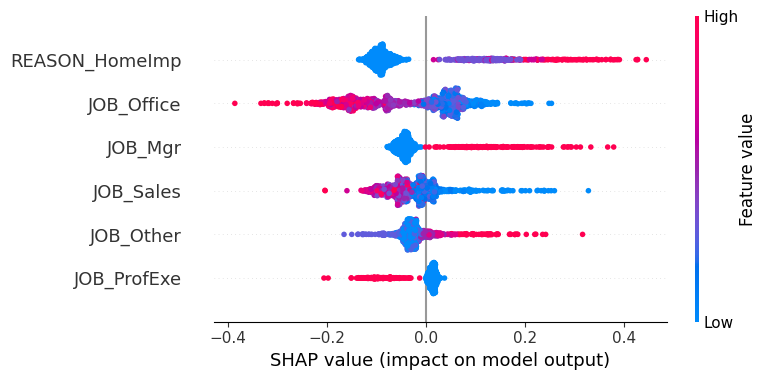

In [53]:
# les shap_values pour la classe 1
shap_values_class_1 = shap_values_final[:, :, 1]

# Résumé de l'importance des features avec SHAP pour la classe 1
shap.summary_plot(shap_values_class_1, X_test_final, feature_names=selected_features)

Commentaire :

La logique derrière ces variables est conforme aux pratiques de gestion du risque de crédit car des individus avec un endettement élevé, un historique de délinquance, et un crédit plus récent (âge de crédit plus court) présentent un risque accru de défaut.

**Comparaison des Modèles Random Forest (RF)**

Nous comparons quatre versions du modèle Random Forest :

1. RF Basique (sans optimisation)
2. RF avec Seuils Pratiques
3. RF Optimisé avec Grid Search
4. RF avec Sélection de Features (F1 élevé + p-value faible)

**Tableau Comparatif**

| Métrique | RF Basique (Train/Test) | RF Seuils Pratiques (Train/Test) | RF Optimisé (Train/Test) | RF avec Sélection (Train/Test) | Meilleur Modèle |
| --- | --- | --- | --- | --- | --- |
| Accuracy | 0.947 / 0.885 | 0.950 / 0.885 | 0.907 / 0.855 | 0.893 / 0.850 | Seuils Pratiques ✅ |
| AUC | 0.925 / 0.820 | 0.924 / 0.813 | 0.881 / 0.807 | 0.940 / 0.881 | Sélection de Features ✅ |
| Recall | 0.889 / 0.708 | 0.881 / 0.688 | 0.839 / 0.724 | 0.801 / 0.688 | Optimisé (Grid Search) ✅ |
| Precision | 0.845 / 0.738 | 0.864 / 0.748 | 0.722 / 0.640 | 0.692 / 0.635 | Seuils Pratiques ✅ |
| F1-Score | 0.867 / 0.722 | 0.872 / 0.717 | 0.776 / 0.679 | 0.742 / 0.660 | Seuils Pratiques ✅ |

**Analyse des Résultats**

🔹 **Le modèle avec Seuils Pratiques est le plus équilibré :**
- Meilleure précision (0.748 vs 0.640 pour Grid Search).
- Meilleure accuracy (88.5%) et F1-score correct (0.717).
- Évite l'overfitting tout en conservant une bonne performance.

🔹 **Le modèle avec Sélection de Features offre une meilleure AUC (0.881 vs 0.813) :**
- Cela signifie qu'il distingue mieux les classes.
- Cependant, il a une précision et un F1-score plus bas, ce qui peut poser problème.

🔹 **Le modèle optimisé par Grid Search souffre d'une baisse de performance :**
- Il overfit moins, mais sa précision et son F1-score sont plus bas.
- Moins intéressant en pratique, car il ne généralise pas mieux que les seuils pratiques.

🔹 **Le modèle basique est déjà performant mais légèrement inférieur aux Seuils Pratiques :**
- Légère amélioration avec les seuils (précision et stabilité accrues).

🏆 **Meilleur Modèle : Random Forest avec Seuils Pratiques ✅**
